In [1]:
# libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libraries to help with data visualitsation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# library to impute missing values
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

# library to build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

#library to supress the warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../input/kagglex-bipoc-2022-2023-ml-foundation/Train.csv')
safe = df.copy()

In [9]:
df.rename(columns = {
#             'ID': , 
            'AAGE': 'age', 
            'ACLSWKR': 'class of worker', 
            'ADTIND': 'industry code', 
            'ADTOCC': 'occupation code', 
            'AHGA':'education', 
            'AHRSPAY':'wage per hour',
            'AHSCOL':'enrolled in edu inst last wk', 
            'AMARITL':'marital status', 
            'AMJIND':'major industry code', 
            'AMJOCC':'major occupation code', 
            'ARACE':'race', 
            'AREORGN':'hispanic origin', 
            'ASEX':'gender',
            'AUNMEM':'member of a labor union', 
            'AUNTYPE':'reason for unemployment', 
            'AWKSTAT':'full or part time employment stat', 
            'CAPGAIN':'capital gains', 
            'CAPLOSS':'capital losses', 
            'DIVVAL':'divdends from stocks',
            'FILESTAT': 'tax filer status', 
            'GRINREG':'region of previous residence', 
            'GRINST':'state of previous residence', 
            'HHDFMX':'detailed household and family stat', 
            'HHDREL':'detailed household summary in household', 
            'MIGMTR1':'migration code-change in msa',
            'MIGMTR3':'migration code-change in reg', 
            'MIGMTR4':'migration code-move within reg', 
            'MIGSAME':'live in this house 1 year ago', 
            'MIGSUN':'migration prev res in sunbelt', 
            'NOEMP':'num persons worked for employer', 
            'PARENT':'family members under 18',
            'PEFNTVTY':'country of birth father', 
            'PEMNTVTY':'country of birth mother', 
            'PENATVTY':'country of birth self', 
            'PRCITSHP':'citizenship', 
            'SEOTR':'own business or self employed', 
            'VETQVA':'fill inc questionnaire for veteran\'s admin',
            'VETYN':'veterans benefits', 
            'WKSWORK':'weeks worked in year', 
#             'YEAR', 
#             'TARGET'    
}, inplace=True)

In [10]:
df.head()

,ID,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,YEAR,TARGET
0,shydl6zxik4o,22,Not in universe,0,0,High school graduate,0,Not in universe,Divorced,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,36,1995,0
1,2dhm421r62rr,37,Private,35,33,Some college but no degree,0,Not in universe,Divorced,Finance insurance and real estate,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,47,1995,0
2,ys7nzza2hffj,83,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Widowed,Not in universe or children,...,Puerto-Rico,Puerto-Rico,Puerto-Rico,Native- Born in Puerto Rico or U S Outlying,0,Not in universe,2,0,1995,0
3,iqrpxh3sr7n1,46,Private,32,35,High school graduate,0,Not in universe,Married-civilian spouse present,Wholesale trade,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,1995,0
4,rr8vlzk9iwyn,35,Private,34,26,Associates degree-academic program,0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,45,1995,0


In [12]:
df.columns

Index(['ID', 'age', 'class of worker', 'industry code', 'occupation code',
       'education', 'wage per hour', 'enrolled in edu inst last wk',
       'marital status', 'major industry code', 'major occupation code',
       'race', 'hispanic origin', 'gender', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'divdends from stocks',
       'tax filer status', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or self employ

In [13]:
df.shape

(157509, 42)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157509 entries, 0 to 157508
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   ID                                          157509 non-null  object
 1   age                                         157509 non-null  int64 
 2   class of worker                             157509 non-null  object
 3   industry code                               157509 non-null  int64 
 4   occupation code                             157509 non-null  int64 
 5   education                                   157509 non-null  object
 6   wage per hour                               157509 non-null  int64 
 7   enrolled in edu inst last wk                157509 non-null  object
 8   marital status                              157509 non-null  object
 9   major industry code                         157509 non-null  object
 10  major oc

In [17]:
# checking the percentage of missing values in each column
pd.DataFrame(data={'% of Missing Values': round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
migration code-change in msa,49.09
migration code-change in reg,49.09
migration code-move within reg,49.09
migration prev res in sunbelt,49.09
country of birth father,4.19
country of birth mother,3.81
country of birth self,2.22
state of previous residence,0.44
citizenship,0.00
own business or self employed,0.00


In [18]:
# summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,157509.0,39.816112,19.404058,0.0,26.0,38.0,52.0,90.0
industry code,157509.0,20.308440,18.183850,0.0,0.0,24.0,37.0,51.0
occupation code,157509.0,14.971830,14.890825,0.0,0.0,12.0,29.0,46.0
wage per hour,157509.0,72.889797,311.546534,0.0,0.0,0.0,0.0,9916.0
capital gains,157509.0,577.585992,5403.024319,0.0,0.0,0.0,0.0,99999.0
capital losses,157509.0,49.300015,311.199032,0.0,0.0,0.0,0.0,4608.0
divdends from stocks,157509.0,264.806386,2282.967898,0.0,0.0,0.0,0.0,99999.0
num persons worked for employer,157509.0,2.580913,2.400063,0.0,0.0,2.0,5.0,6.0
own business or self employed,157509.0,0.234825,0.629650,0.0,0.0,0.0,0.0,2.0
veterans benefits,157509.0,1.834517,0.538978,0.0,2.0,2.0,2.0,2.0


In [19]:
df.drop(['ID'],axis = 1, inplace = True)

In [20]:
df.describe(include=['object']).T

,count,unique,top,freq
class of worker,157509,9,Private,75191
education,157509,17,High school graduate,45275
enrolled in edu inst last wk,157509,3,Not in universe,146493
marital status,157509,7,Married-civilian spouse present,80573
major industry code,157509,24,Not in universe or children,54287
major occupation code,157509,15,Not in universe,54287
race,157509,5,White,130826
hispanic origin,157509,10,All other,132835
gender,157509,2,Female,80625
member of a labor union,157509,3,Not in universe,137677


In [21]:
# skipping the univariate analysis due to lack of time

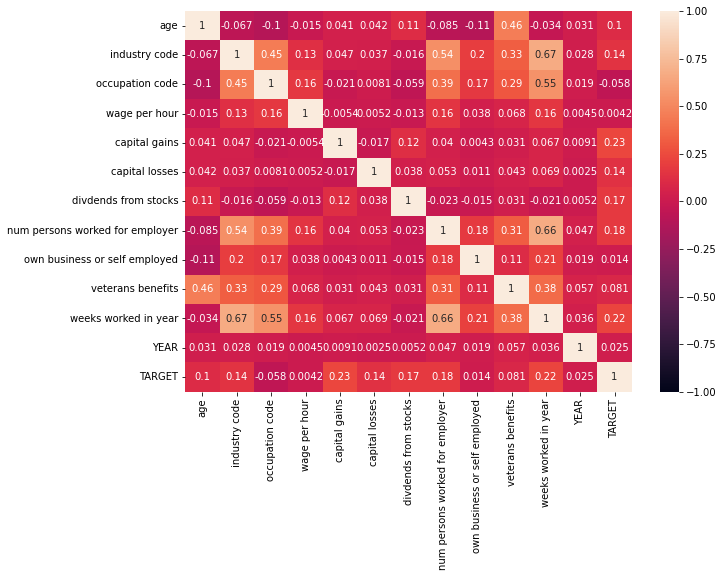

In [23]:
# bivariate analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax = 1,fmt='.2g')
plt.show()

In [25]:
df['TARGET'].replace(1,'yes',inplace = True)
df['TARGET'].replace(0,'no',inplace = True)

In [26]:
# multivariate analysis
def stacked_plot(x):
    sns.set()
    # crosstab
    tab1 = pd.crosstab(x,df['TARGET'], normalize='index').sort_values(by = 'yes',ascending=False)
    print(tab1)
    print('-'*120)
    # visualizing the cross tab
    tab = pd.crosstab(x,df['TARGET'], normalize='index').sort_values(by = 'yes',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

age
TARGET        no       yes
age                       
52      0.823872  0.176128
50      0.823899  0.176101
54      0.826307  0.173693
51      0.827260  0.172740
48      0.828283  0.171717
..           ...       ...
12      1.000000  0.000000
13      1.000000  0.000000
14      1.000000  0.000000
15      1.000000  0.000000
0       1.000000  0.000000

[91 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


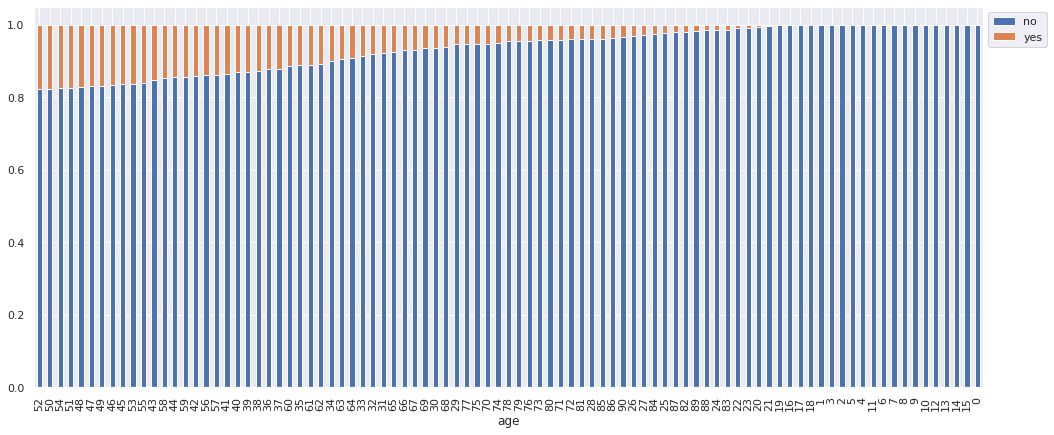


class of worker
TARGET                                 no       yes
class of worker                                    
 Self-employed-incorporated      0.648918  0.351082
 Federal government              0.807268  0.192732
 Self-employed-not incorporated  0.869407  0.130593
 State government                0.880888  0.119112
 Local government                0.891388  0.108612
 Private                         0.898153  0.101847
 Not in universe                 0.982486  0.017514
 Never worked                    0.997423  0.002577
 Without pay                     1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


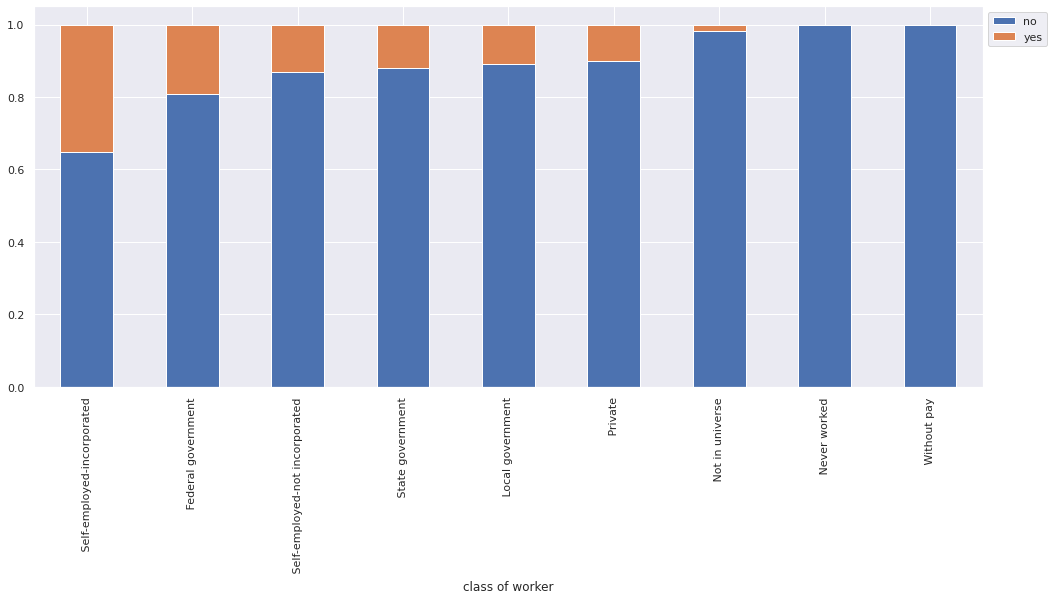


industry code
TARGET               no       yes
industry code                    
20             0.571429  0.428571
26             0.592857  0.407143
3              0.734824  0.265176
25             0.744403  0.255597
30             0.757749  0.242251
13             0.758881  0.241119
45             0.761545  0.238455
15             0.766454  0.233546
16             0.770370  0.229630
31             0.772581  0.227419
14             0.778125  0.221875
49             0.783307  0.216693
12             0.798439  0.201561
51             0.800000  0.200000
34             0.805846  0.194154
11             0.811934  0.188066
35             0.823496  0.176504
47             0.824214  0.175786
50             0.825522  0.174478
8              0.829016  0.170984
23             0.837790  0.162210
32             0.842752  0.157248
9              0.864504  0.135496
42             0.872780  0.127220
37             0.877834  0.122166
41             0.878368  0.121632
46             0.879808  0.120192

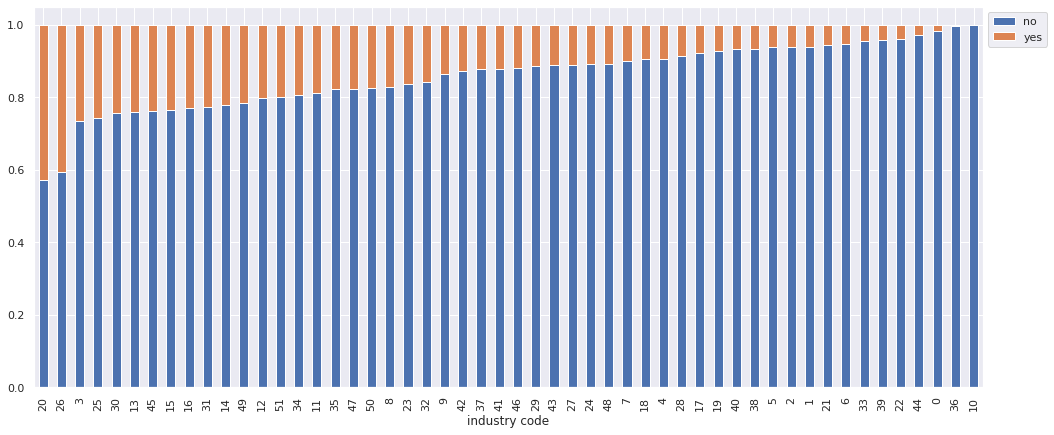


occupation code
TARGET                 no       yes
occupation code                    
7                0.316195  0.683805
11               0.329231  0.670769
4                0.516014  0.483986
5                0.609840  0.390160
6                0.655702  0.344298
2                0.673176  0.326824
18               0.703544  0.296456
9                0.722938  0.277062
17               0.731115  0.268885
1                0.759717  0.240283
15               0.791274  0.208726
3                0.797869  0.202131
46               0.800000  0.200000
16               0.830761  0.169239
8                0.831264  0.168736
28               0.847737  0.152263
21               0.848858  0.151142
12               0.864895  0.135105
14               0.881579  0.118421
33               0.894632  0.105368
10               0.895487  0.104513
39               0.899038  0.100962
35               0.901664  0.098336
45               0.909091  0.090909
43               0.909970  0.090030
34         

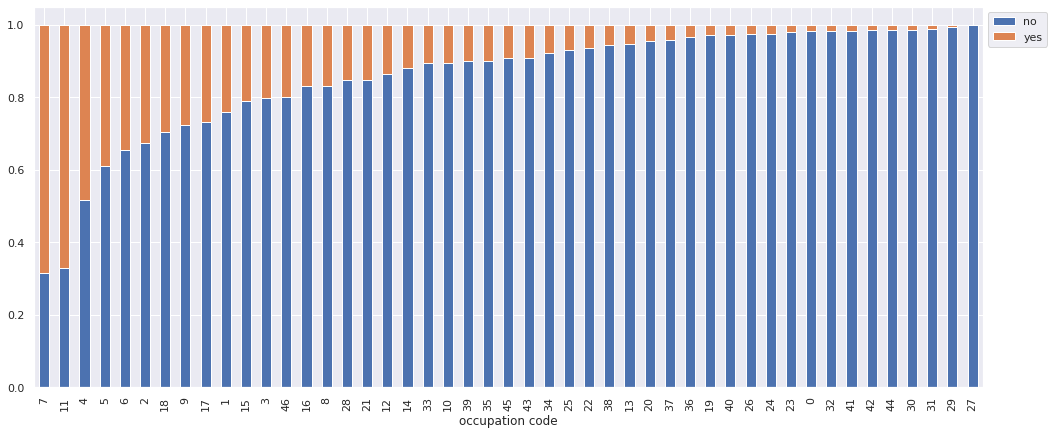


education
TARGET                                         no       yes
education                                                  
 Prof school degree (MD DDS DVM LLB JD)  0.458444  0.541556
 Doctorate degree(PhD EdD)               0.478788  0.521212
 Masters degree(MA MS MEng MEd MSW MBA)  0.685028  0.314972
 Bachelors degree(BA AB BS)              0.793696  0.206304
 Associates degree-academic program      0.906867  0.093133
 Associates degree-occup /vocational     0.922550  0.077450
 Some college but no degree              0.932859  0.067141
 High school graduate                    0.956334  0.043666
 12th grade no diploma                   0.985864  0.014136
 7th and 8th grade                       0.987500  0.012500
 11th grade                              0.988112  0.011888
 10th grade                              0.989447  0.010553
 9th grade                               0.990491  0.009509
 5th or 6th grade                        0.990904  0.009096
 1st 2nd 3rd or 4th grade    

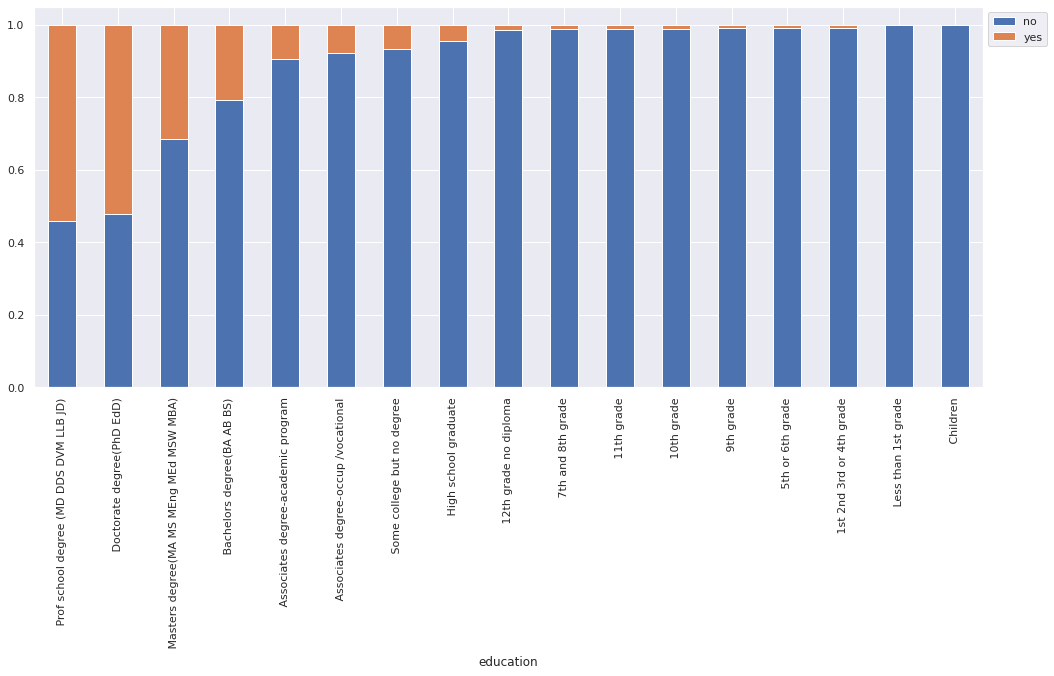


wage per hour
TARGET          no  yes
wage per hour          
1830           0.0  1.0
2373           0.0  1.0
1607           0.0  1.0
2915           0.0  1.0
2141           0.0  1.0
...            ...  ...
933            1.0  0.0
932            1.0  0.0
930            1.0  0.0
929            1.0  0.0
9916           1.0  0.0

[1275 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


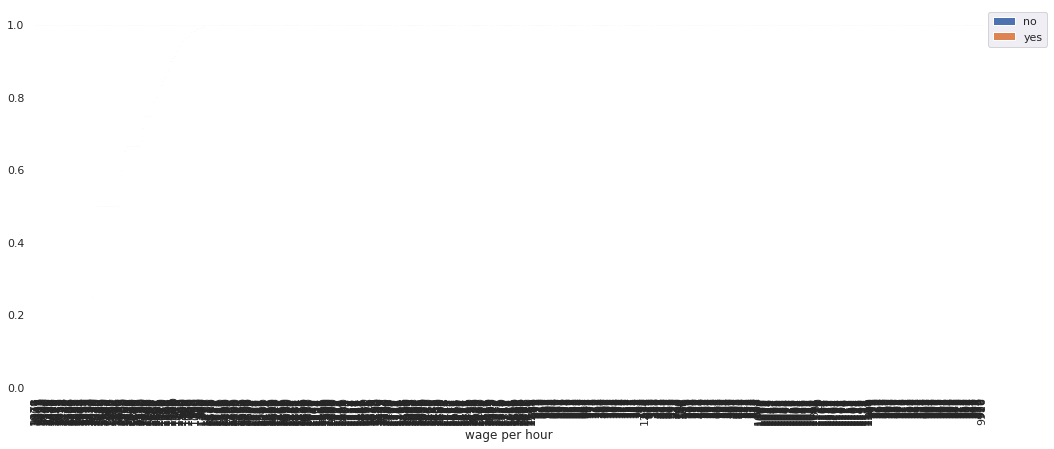


enrolled in edu inst last wk
TARGET                              no       yes
enrolled in edu inst last wk                    
 Not in universe              0.911607  0.088393
 College or university        0.995270  0.004730
 High school                  0.999094  0.000906
------------------------------------------------------------------------------------------------------------------------


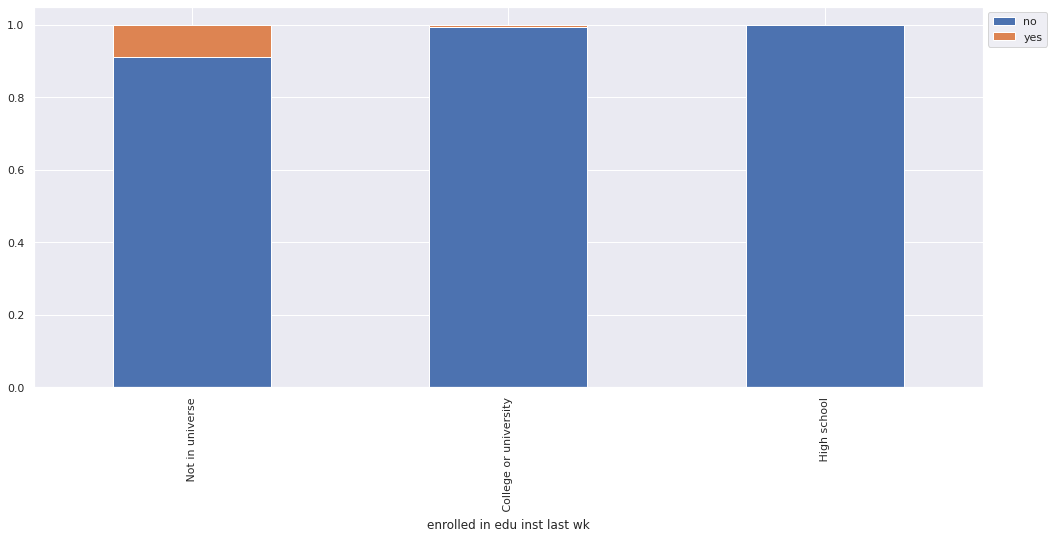


marital status
TARGET                                  no       yes
marital status                                      
 Married-civilian spouse present  0.874635  0.125365
 Divorced                         0.916018  0.083982
 Married-spouse absent            0.943372  0.056628
 Separated                        0.958192  0.041808
 Widowed                          0.959218  0.040782
 Never married                    0.976519  0.023481
 Married-A F spouse present       0.977745  0.022255
------------------------------------------------------------------------------------------------------------------------


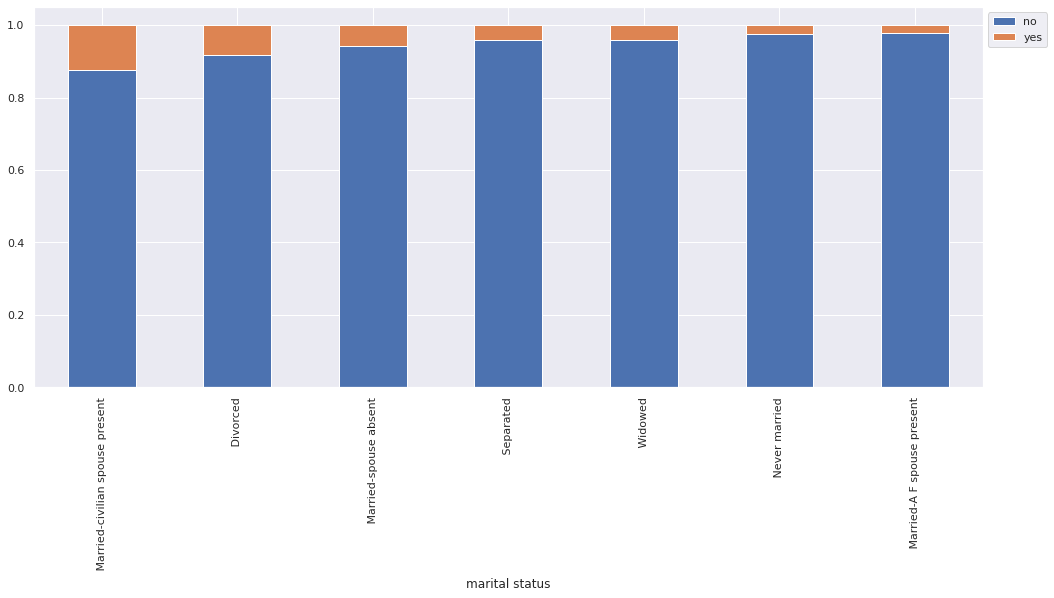


major industry code
TARGET                                      no       yes
major industry code                                     
 Mining                               0.734824  0.265176
 Communications                       0.757749  0.242251
 Other professional services          0.761545  0.238455
 Utilities and sanitary services      0.772581  0.227419
 Armed Forces                         0.800000  0.200000
 Finance insurance and real estate    0.815609  0.184391
 Public administration                0.828727  0.171273
 Manufacturing-durable goods          0.833087  0.166913
 Wholesale trade                      0.842752  0.157248
 Medical except hospital              0.872780  0.127220
 Hospital services                    0.878368  0.121632
 Manufacturing-nondurable goods       0.879141  0.120859
 Forestry and fisheries               0.879808  0.120192
 Transportation                       0.887691  0.112309
 Education                            0.888876  0.111124
 Business 

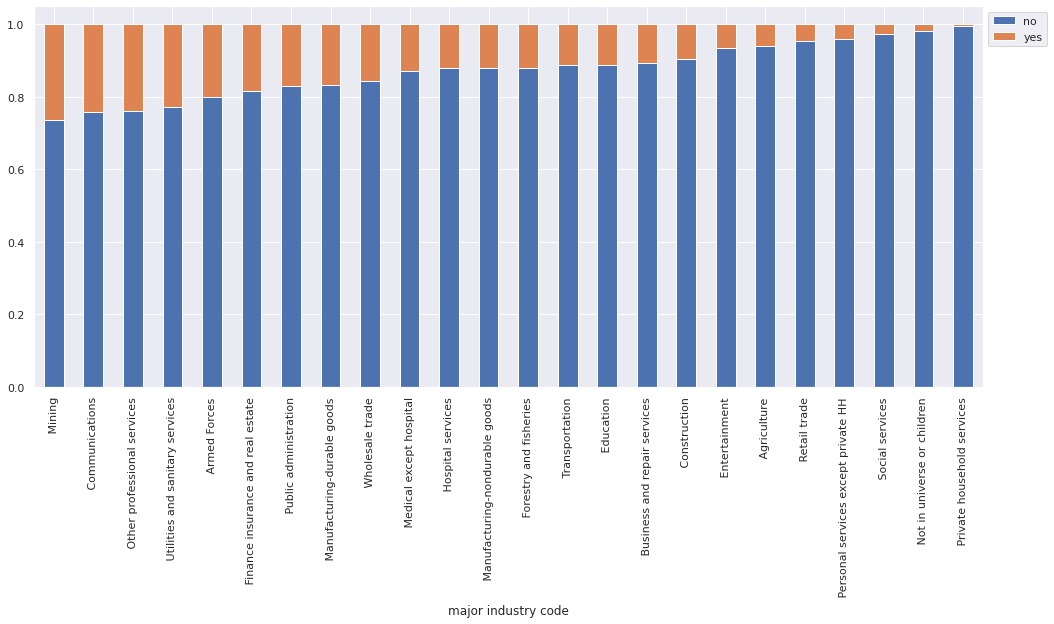


major occupation code
TARGET                                        no       yes
major occupation code                                     
 Executive admin and managerial         0.709188  0.290812
 Professional specialty                 0.750571  0.249429
 Armed Forces                           0.800000  0.200000
 Protective services                    0.847737  0.152263
 Sales                                  0.869065  0.130935
 Technicians and related support        0.885567  0.114433
 Precision production craft & repair    0.907614  0.092386
 Transportation and material moving     0.933114  0.066886
 Farming forestry and fishing           0.949218  0.050782
 Machine operators assmblrs & inspctrs  0.963628  0.036372
 Adm support including clerical         0.968362  0.031638
 Not in universe                        0.982593  0.017407
 Handlers equip cleaners etc            0.983151  0.016849
 Other service                          0.990055  0.009945
 Private household services      

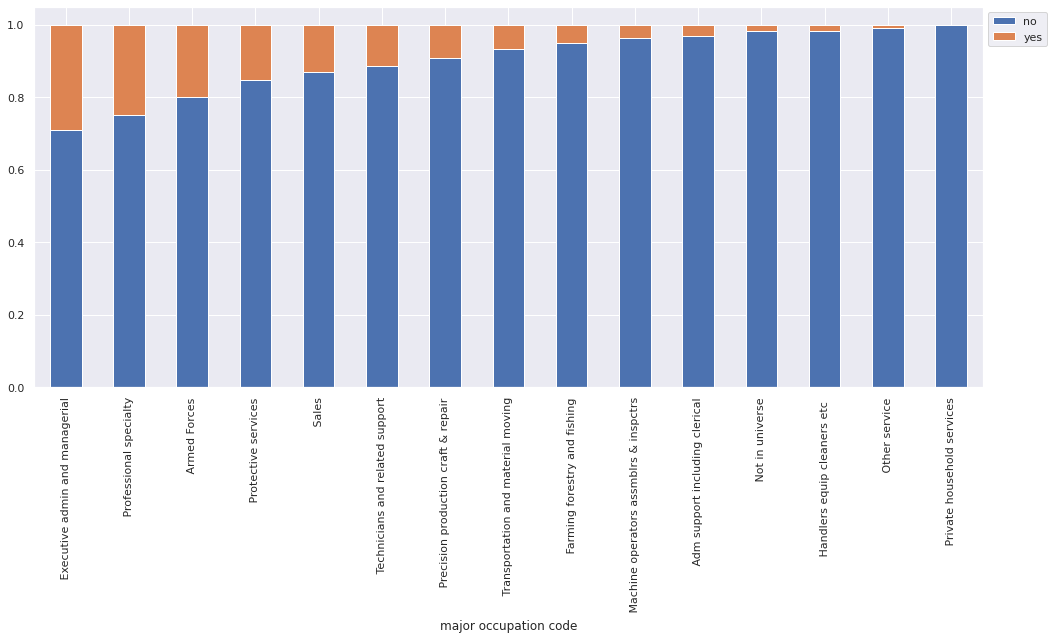


race
TARGET                              no       yes
race                                            
 White                        0.909552  0.090448
 Asian or Pacific Islander    0.920357  0.079643
 Black                        0.964283  0.035717
 Amer Indian Aleut or Eskimo  0.972152  0.027848
 Other                        0.975897  0.024103
------------------------------------------------------------------------------------------------------------------------


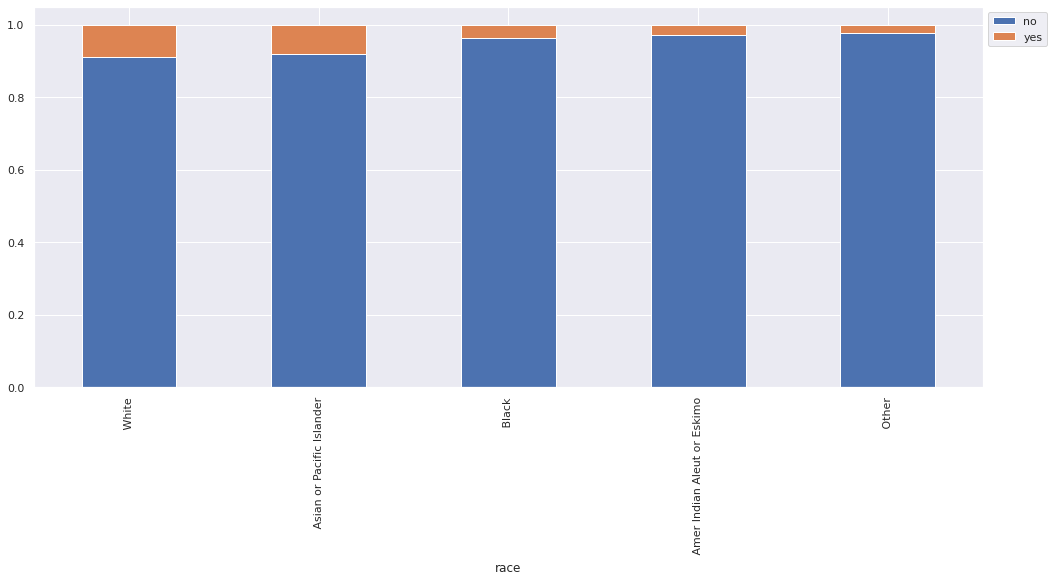


hispanic origin
TARGET                            no       yes
hispanic origin                               
 All other                  0.907216  0.092784
 Cuban                      0.941696  0.058304
 NA                         0.953385  0.046615
 Other Spanish              0.965316  0.034684
 Chicano                    0.968153  0.031847
 Mexican-American           0.970189  0.029811
 Do not know                0.973154  0.026846
 Central or South American  0.978069  0.021931
 Puerto Rican               0.978325  0.021675
 Mexican (Mexicano)         0.982842  0.017158
------------------------------------------------------------------------------------------------------------------------


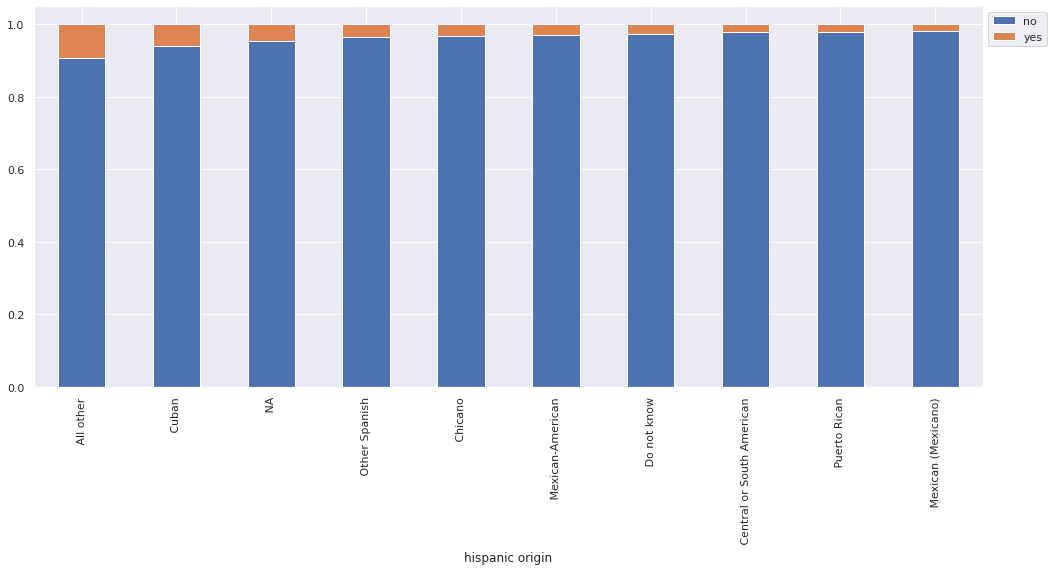


gender
TARGET         no       yes
gender                     
 Male    0.867203  0.132797
 Female  0.965643  0.034357
------------------------------------------------------------------------------------------------------------------------


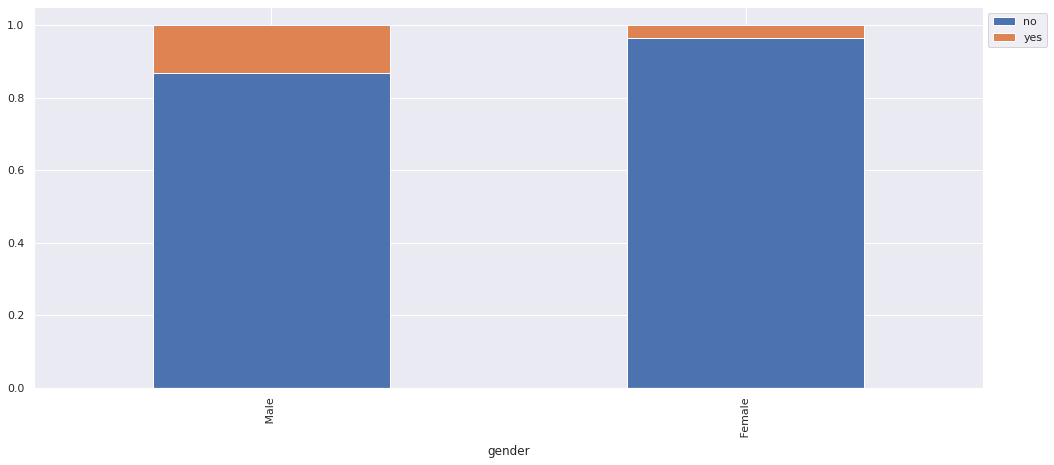


member of a labor union
TARGET                         no       yes
member of a labor union                    
 Yes                     0.867265  0.132735
 No                      0.886436  0.113564
 Not in universe         0.922514  0.077486
------------------------------------------------------------------------------------------------------------------------


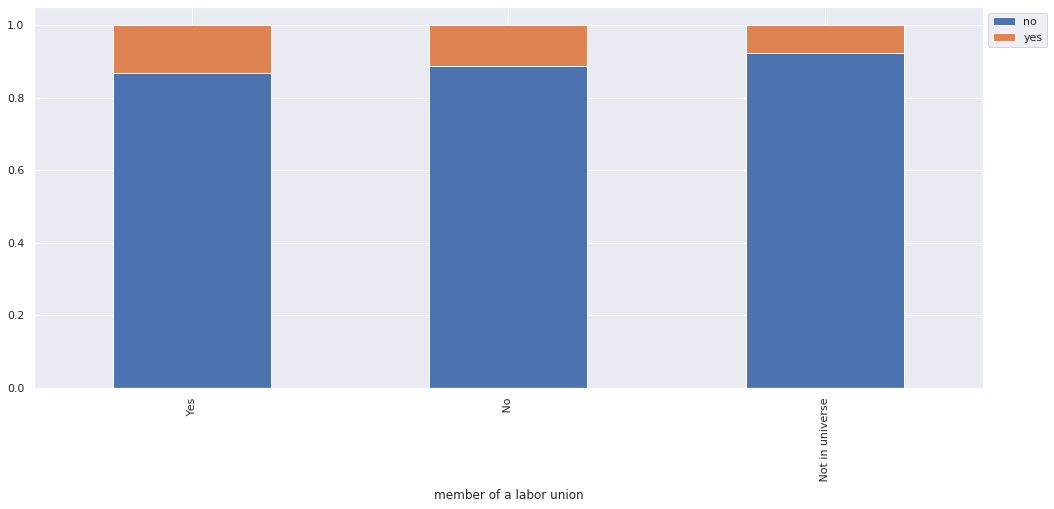


reason for unemployment
TARGET                         no       yes
reason for unemployment                    
 Not in universe         0.915269  0.084731
 Other job loser         0.945035  0.054965
 Job leaver              0.965964  0.034036
 Job loser - on layoff   0.981696  0.018304
 Re-entrant              0.992684  0.007316
 New entrant             0.997423  0.002577
------------------------------------------------------------------------------------------------------------------------


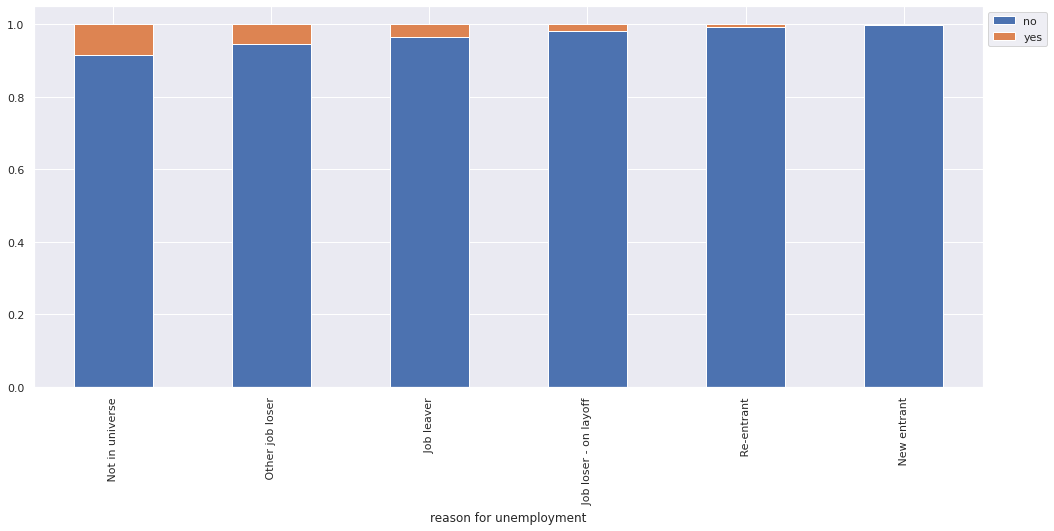


full or part time employment stat
TARGET                                     no       yes
full or part time employment stat                      
 Full-time schedules                 0.867107  0.132893
 PT for econ reasons usually PT      0.871383  0.128617
 PT for non-econ reasons usually FT  0.884928  0.115072
 Children or Armed Forces            0.928473  0.071527
 PT for econ reasons usually FT      0.951957  0.048043
 Unemployed full-time                0.967020  0.032980
 Not in labor force                  0.975327  0.024673
 Unemployed part- time               0.976526  0.023474
------------------------------------------------------------------------------------------------------------------------


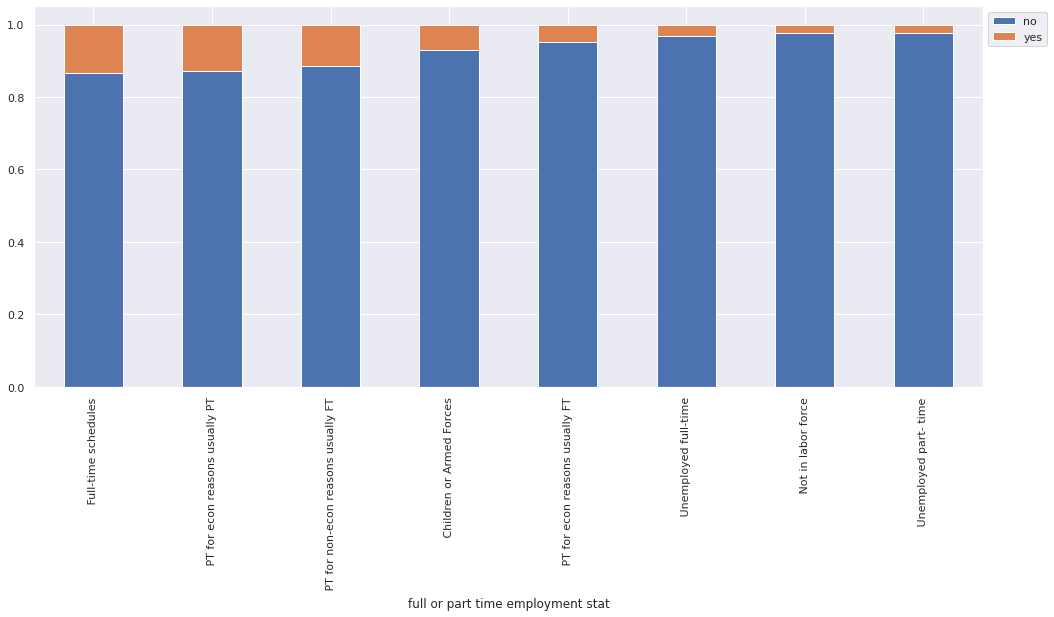


capital gains
TARGET          no  yes
capital gains          
4687           0.0  1.0
8530           0.0  1.0
27828          0.0  1.0
25236          0.0  1.0
25124          0.0  1.0
...            ...  ...
3781           1.0  0.0
3674           1.0  0.0
114            1.0  0.0
3464           1.0  0.0
3471           1.0  0.0

[132 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


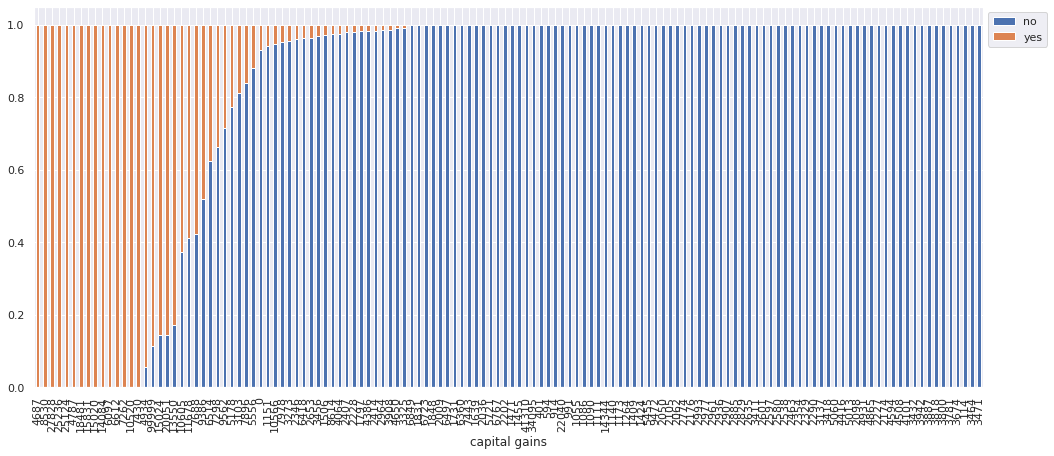


capital losses
TARGET           no  yes
capital losses          
1911            0.0  1.0
2472            0.0  1.0
2201            0.0  1.0
2231            0.0  1.0
1755            0.0  1.0
...             ...  ...
2002            1.0  0.0
2001            1.0  0.0
1980            1.0  0.0
1539            1.0  0.0
4608            1.0  0.0

[112 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


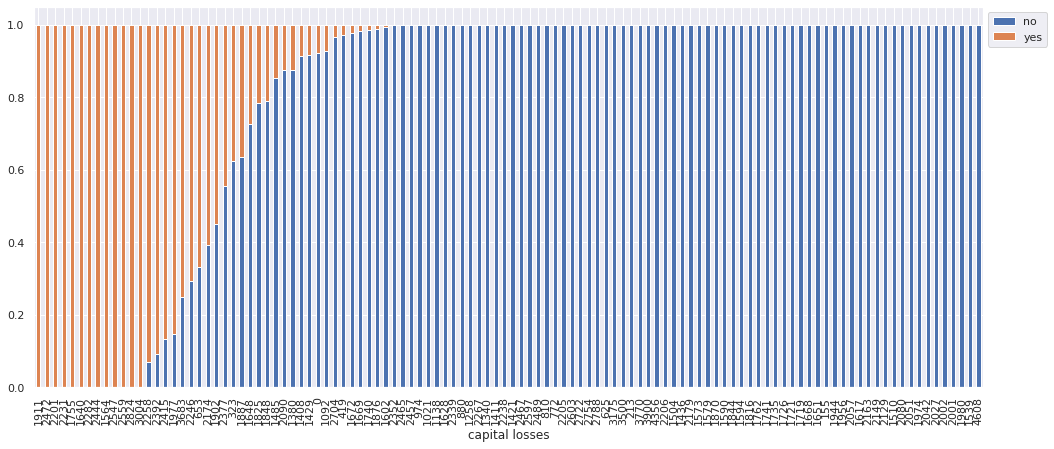


divdends from stocks
TARGET                 no  yes
divdends from stocks          
99999                 0.0  1.0
2022                  0.0  1.0
1486                  0.0  1.0
42438                 0.0  1.0
2036                  0.0  1.0
...                   ...  ...
2006                  1.0  0.0
592                   1.0  0.0
2017                  1.0  0.0
2019                  1.0  0.0
1258                  1.0  0.0

[1509 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


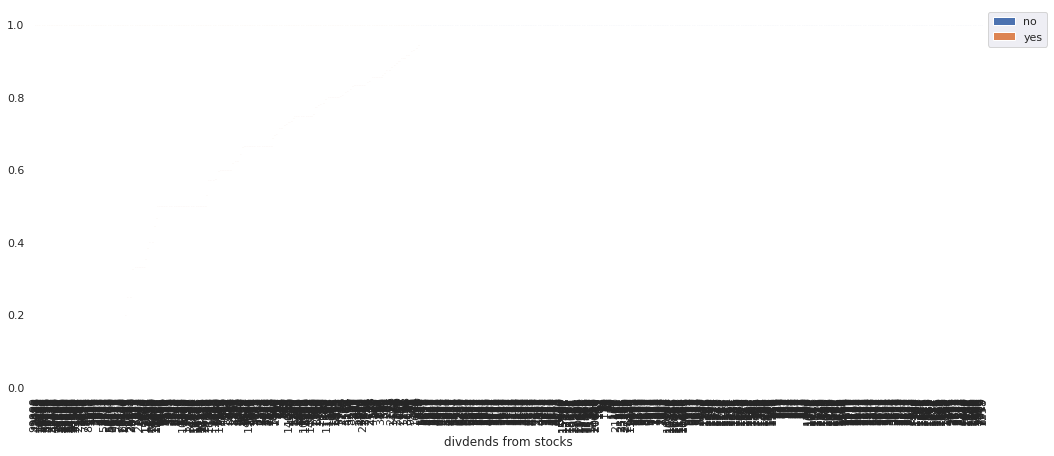


tax filer status
TARGET                               no       yes
tax filer status                                 
 Joint both under 65           0.860560  0.139440
 Joint one under 65 & one 65+  0.904919  0.095081
 Joint both 65+                0.930547  0.069453
 Single                        0.938123  0.061877
 Head of household             0.940384  0.059616
 Nonfiler                      0.999011  0.000989
------------------------------------------------------------------------------------------------------------------------


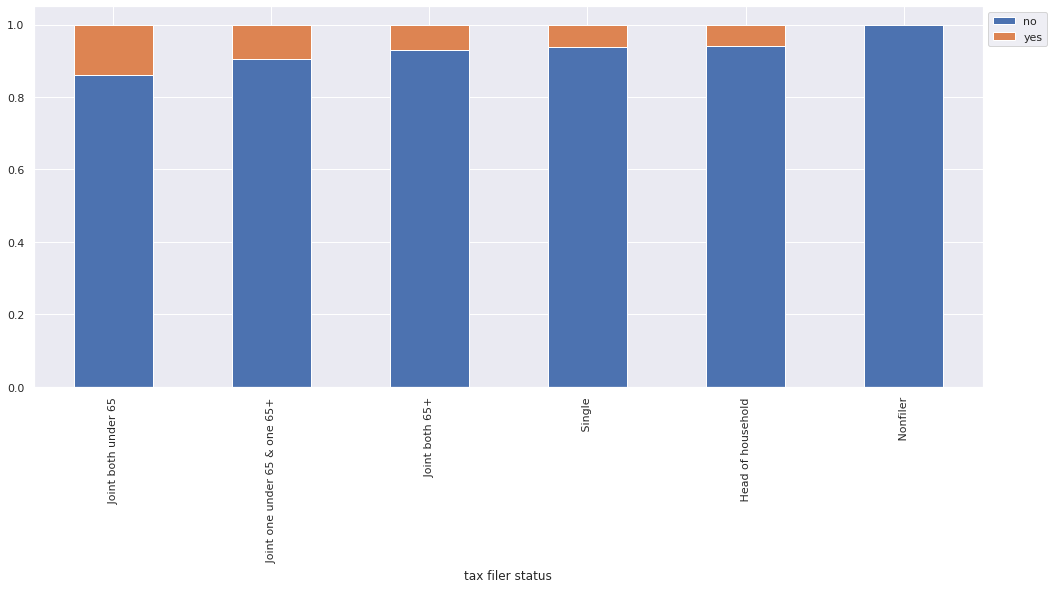


region of previous residence
TARGET                              no       yes
region of previous residence                    
 Not in universe              0.912975  0.087025
 Northeast                    0.941220  0.058780
 West                         0.957018  0.042982
 South                        0.962749  0.037251
 Midwest                      0.967213  0.032787
 Abroad                       0.967807  0.032193
------------------------------------------------------------------------------------------------------------------------


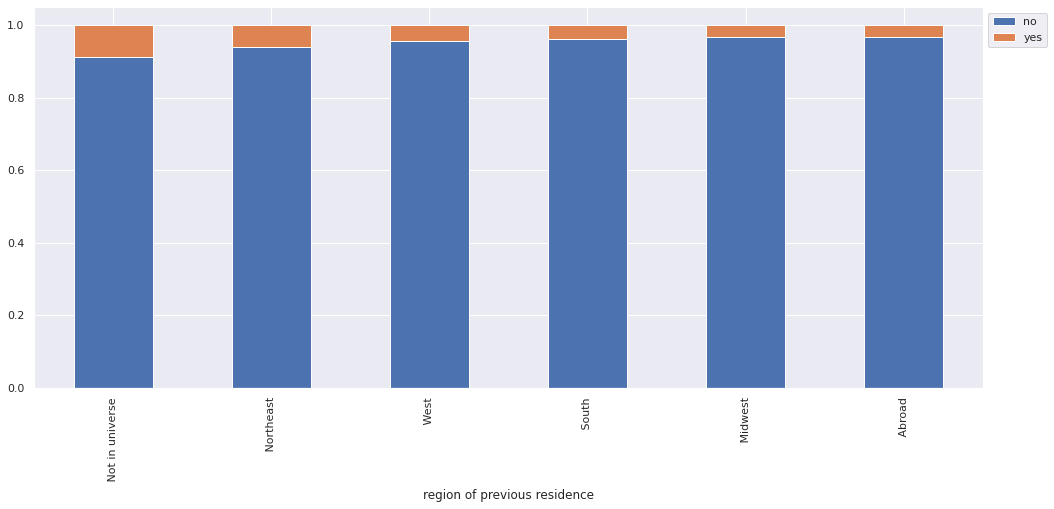


state of previous residence
TARGET                             no       yes
state of previous residence                    
 Connecticut                 0.899225  0.100775
 Alaska                      0.908046  0.091954
 Not in universe             0.912975  0.087025
 New Mexico                  0.934043  0.065957
 New Jersey                  0.934211  0.065789
 Michigan                    0.936219  0.063781
 District of Columbia        0.936937  0.063063
 North Carolina              0.936948  0.063052
 Delaware                    0.942529  0.057471
 Massachusetts               0.948052  0.051948
 West Virginia               0.948936  0.051064
 Florida                     0.949883  0.050117
 Colorado                    0.950000  0.050000
 California                  0.953542  0.046458
 Minnesota                   0.957411  0.042589
 Maine                       0.960526  0.039474
 Wisconsin                   0.960938  0.039062
 Montana                     0.961373  0.038627
 Kentucky  

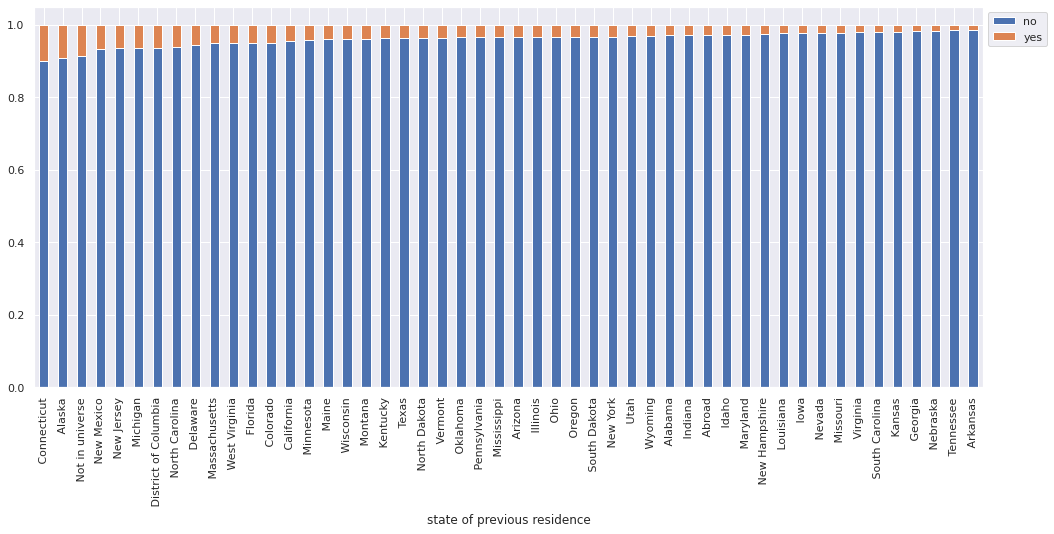


detailed household and family stat
TARGET                                                  no       yes
detailed household and family stat                                  
 Householder                                      0.844677  0.155323
 Spouse of RP of unrelated subfamily              0.903846  0.096154
 Nonfamily householder                            0.913062  0.086938
 Spouse of householder                            0.937205  0.062795
 Other Rel 18+ spouse of subfamily RP             0.963289  0.036711
 Secondary individual                             0.964354  0.035646
 Grandchild 18+ ever marr not in subfamily        0.969697  0.030303
 Other Rel 18+ ever marr RP of subfamily          0.971014  0.028986
 Child 18+ ever marr Not in a subfamily           0.976471  0.023529
 Child 18+ ever marr RP of subfamily              0.980337  0.019663
 Child 18+ spouse of subfamily RP                 0.980392  0.019608
 Other Rel 18+ never marr not in subfamily        0.986395  0.01360

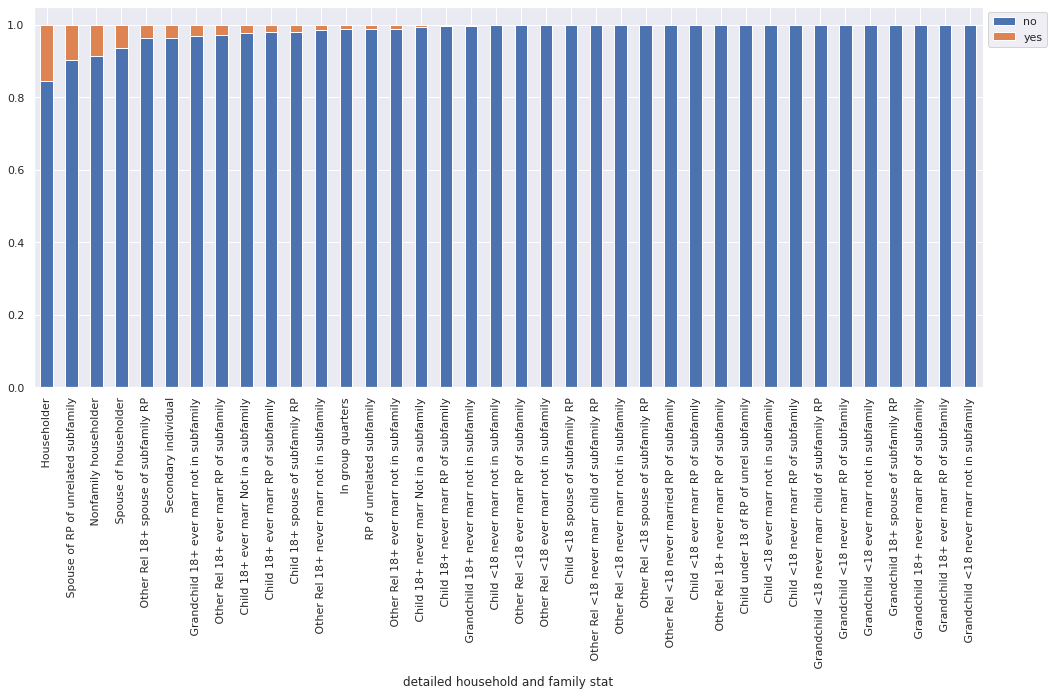


detailed household summary in household
TARGET                                         no       yes
detailed household summary in household                    
 Householder                             0.864324  0.135676
 Spouse of householder                   0.937223  0.062777
 Nonrelative of householder              0.968311  0.031689
 Group Quarters- Secondary individual    0.982301  0.017699
 Other relative of householder           0.988232  0.011768
 Child 18 or older                       0.991367  0.008633
 Child under 18 never married            0.999866  0.000134
 Child under 18 ever married             1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


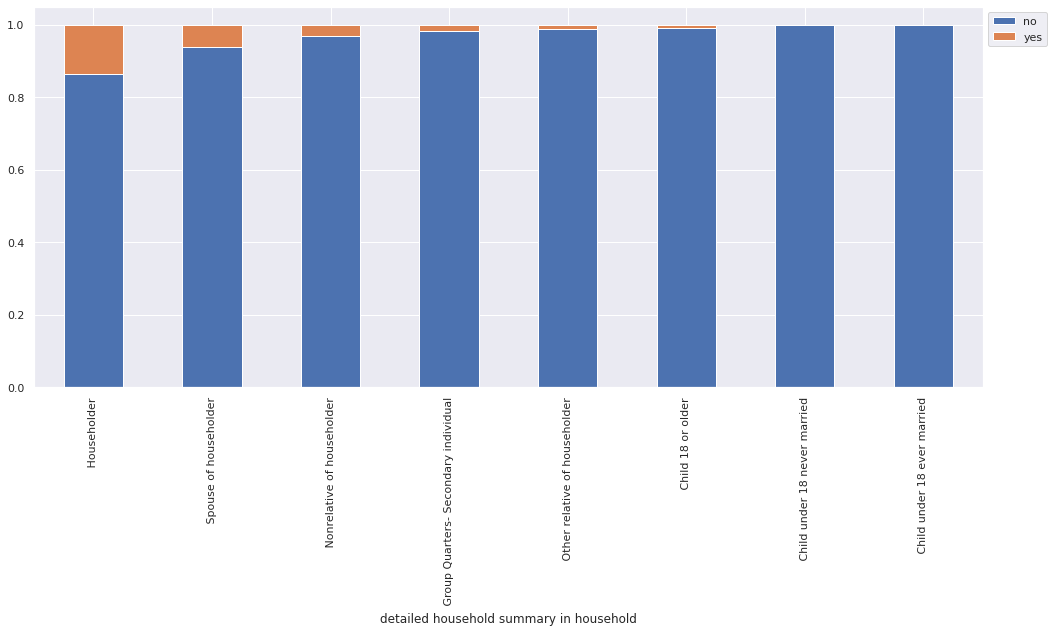


migration code-change in msa
TARGET                              no       yes
migration code-change in msa                    
 Nonmover                     0.915521  0.084479
 MSA to MSA                   0.950337  0.049663
 NonMSA to MSA                0.962264  0.037736
 Abroad to MSA                0.966587  0.033413
 MSA to nonMSA                0.966752  0.033248
 Not identifiable             0.970721  0.029279
 Abroad to nonMSA             0.972603  0.027397
 NonMSA to nonMSA             0.983854  0.016146
 Not in universe              1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


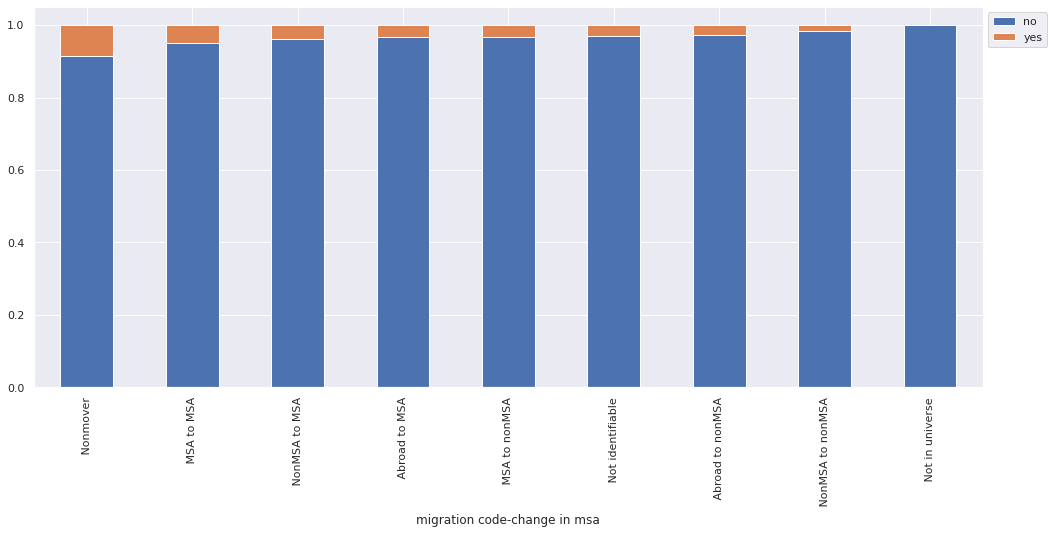


migration code-change in reg
TARGET                                 no       yes
migration code-change in reg                       
 Nonmover                        0.915521  0.084479
 Different division same region  0.938689  0.061311
 Different region                0.940545  0.059455
 Different county same state     0.954939  0.045061
 Different state same division   0.955598  0.044402
 Same county                     0.962933  0.037067
 Abroad                          0.967807  0.032193
 Not in universe                 1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


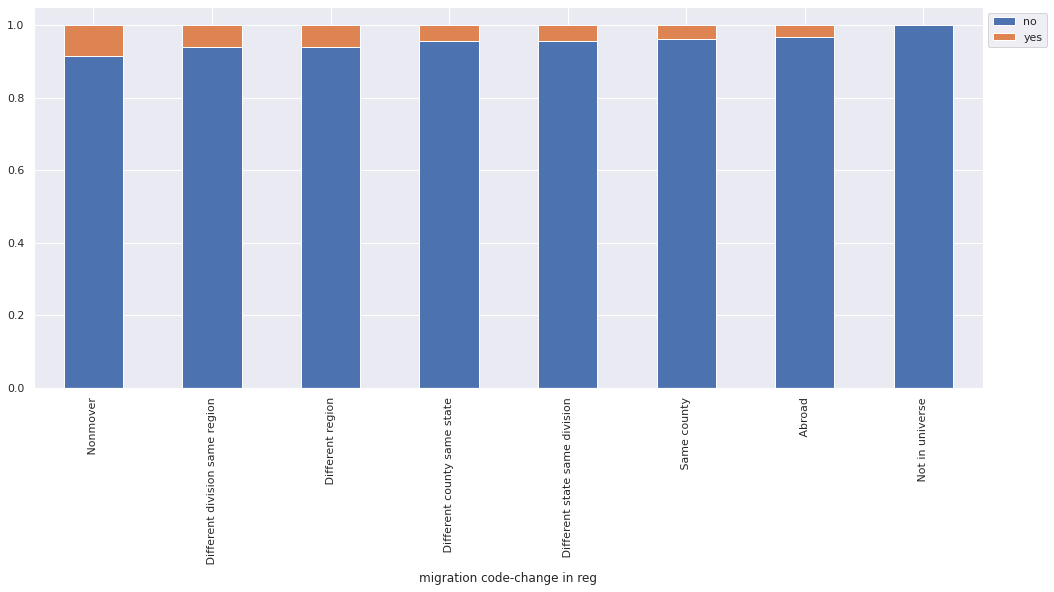


migration code-move within reg
TARGET                                no       yes
migration code-move within reg                    
 Nonmover                       0.915521  0.084479
 Different state in Northeast   0.927438  0.072562
 Different state in South       0.945866  0.054134
 Different state in West        0.951636  0.048364
 Different state in Midwest     0.953571  0.046429
 Different county same state    0.954939  0.045061
 Same county                    0.962933  0.037067
 Abroad                         0.967807  0.032193
 Not in universe                1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


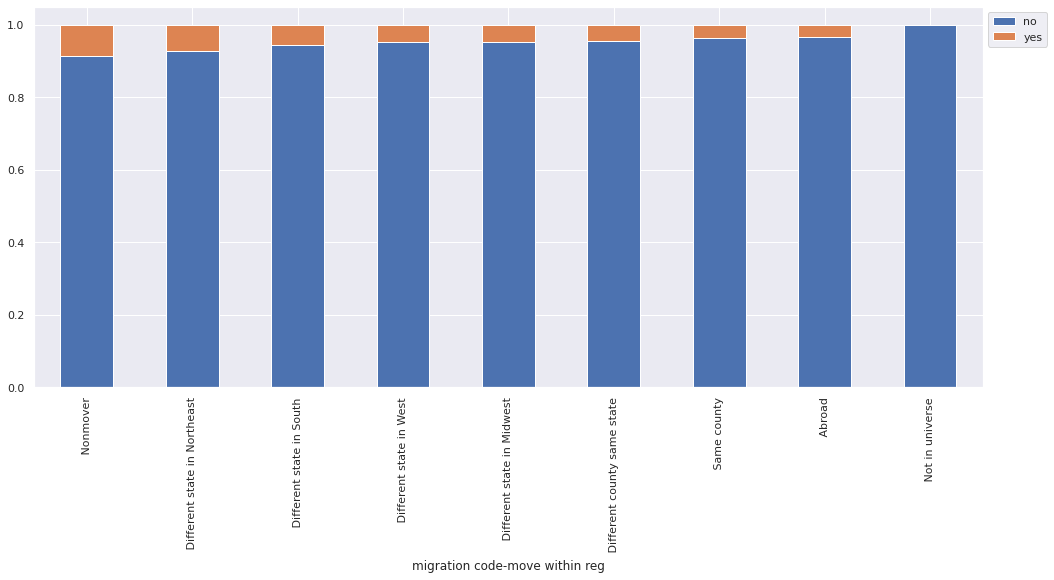


live in this house 1 year ago
TARGET                                   no       yes
live in this house 1 year ago                        
 Not in universe under 1 year old  0.910876  0.089124
 Yes                               0.915521  0.084479
 No                                0.958729  0.041271
------------------------------------------------------------------------------------------------------------------------


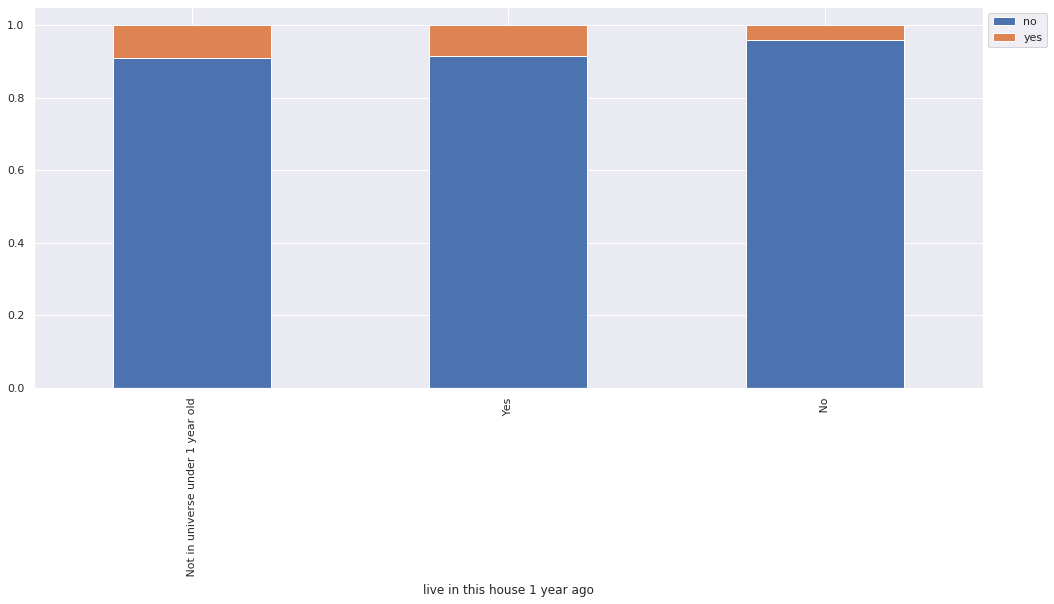


migration prev res in sunbelt
TARGET                               no       yes
migration prev res in sunbelt                    
 Not in universe               0.915918  0.084082
 No                            0.956152  0.043848
 Yes                           0.963088  0.036912
------------------------------------------------------------------------------------------------------------------------


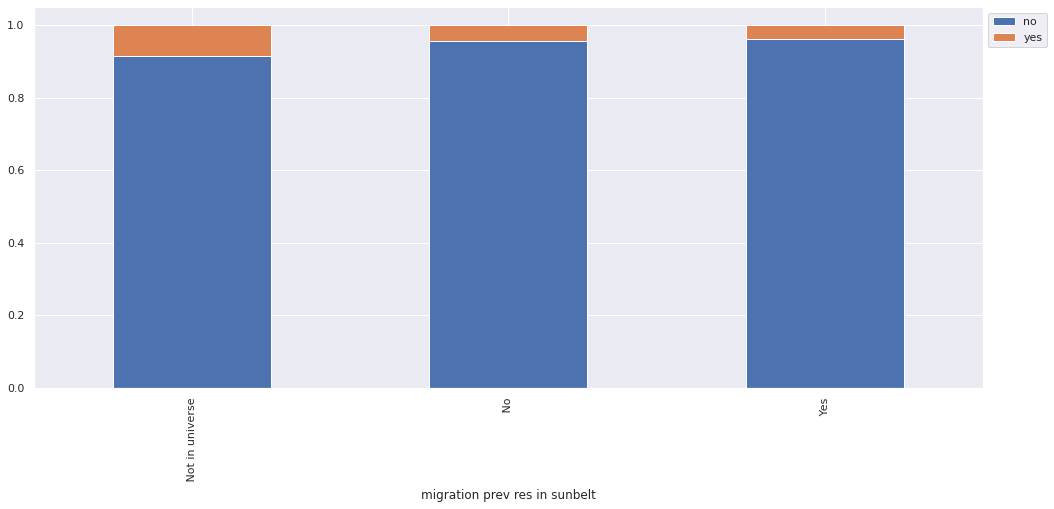


num persons worked for employer
TARGET                                 no       yes
num persons worked for employer                    
6                                0.849239  0.150761
5                                0.886295  0.113705
4                                0.897564  0.102436
3                                0.907662  0.092338
1                                0.909650  0.090350
2                                0.915496  0.084504
0                                0.987250  0.012750
------------------------------------------------------------------------------------------------------------------------


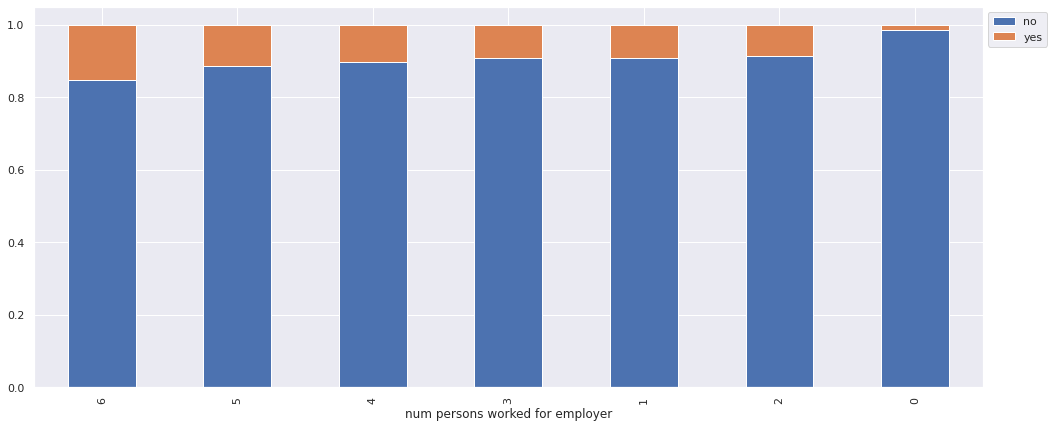


family members under 18
TARGET                         no       yes
family members under 18                    
 Not in universe         0.907376  0.092624
 Both parents present    0.999810  0.000190
 Father only present     1.000000  0.000000
 Mother only present     1.000000  0.000000
 Neither parent present  1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


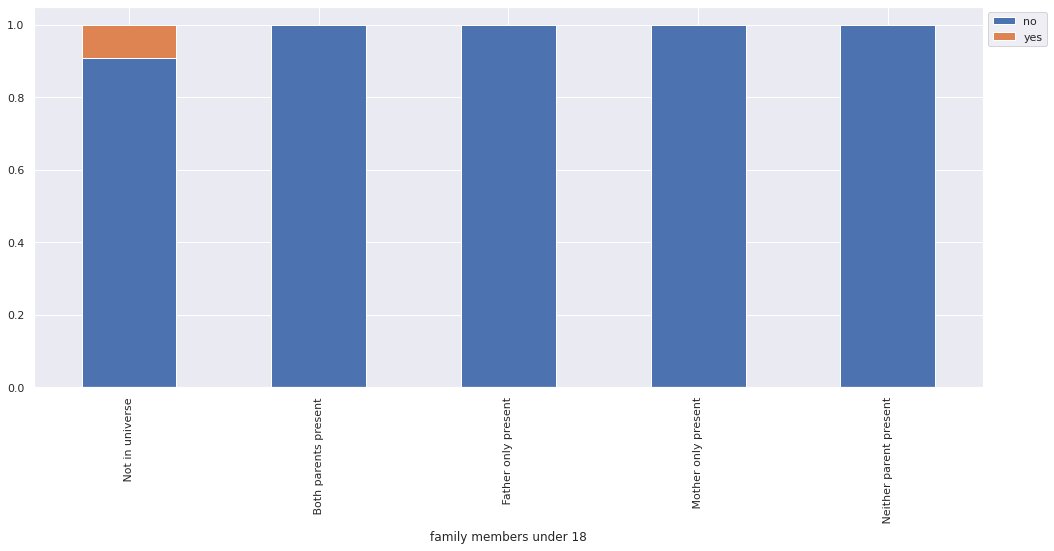


country of birth father
TARGET                               no       yes
country of birth father                          
 India                         0.850594  0.149406
 Iran                          0.864865  0.135135
 Holand-Netherlands            0.870370  0.129630
 Ireland                       0.870629  0.129371
 Greece                        0.871391  0.128609
 England                       0.894541  0.105459
 Japan                         0.895884  0.104116
 Taiwan                        0.896373  0.103627
 Hungary                       0.898413  0.101587
 Poland                        0.900489  0.099511
 France                        0.903226  0.096774
 Canada                        0.906026  0.093974
 China                         0.908088  0.091912
 Germany                       0.909160  0.090840
 United-States                 0.909234  0.090766
 Scotland                      0.919847  0.080153
 Philippines                   0.926193  0.073807
 Italy                   

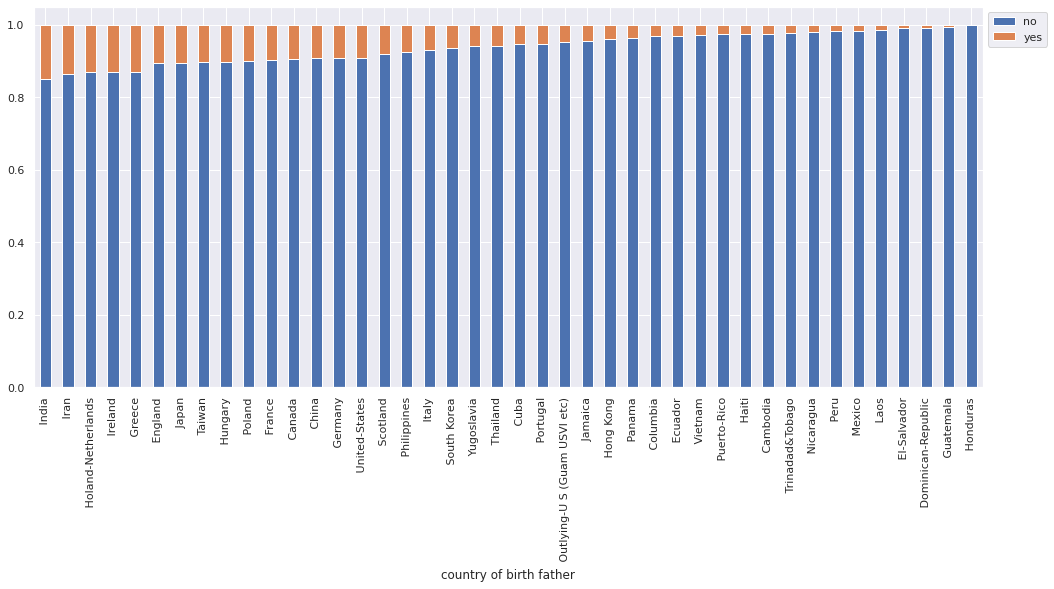


country of birth mother
TARGET                               no       yes
country of birth mother                          
 Holand-Netherlands            0.829787  0.170213
 India                         0.846284  0.153716
 Iran                          0.846561  0.153439
 Ireland                       0.876877  0.123123
 France                        0.883249  0.116751
 Japan                         0.885214  0.114786
 Scotland                      0.892308  0.107692
 Hungary                       0.892744  0.107256
 England                       0.896175  0.103825
 Greece                        0.896907  0.103093
 Germany                       0.900667  0.099333
 Canada                        0.907522  0.092478
 China                         0.907692  0.092308
 United-States                 0.909345  0.090655
 Poland                        0.910953  0.089047
 Taiwan                        0.913636  0.086364
 Philippines                   0.934288  0.065712
 South Korea             

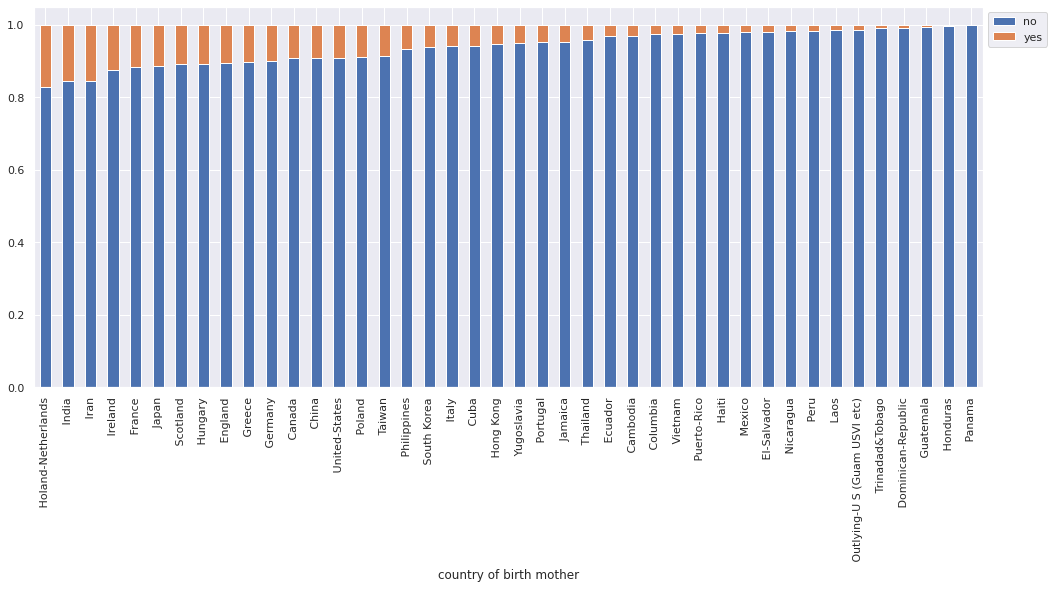


country of birth self
TARGET                               no       yes
country of birth self                            
 India                         0.814059  0.185941
 Iran                          0.814570  0.185430
 Holand-Netherlands            0.833333  0.166667
 Hungary                       0.851351  0.148649
 France                        0.854701  0.145299
 Scotland                      0.855422  0.144578
 Greece                        0.857143  0.142857
 Taiwan                        0.857843  0.142157
 Japan                         0.869942  0.130058
 Ireland                       0.870748  0.129252
 England                       0.884774  0.115226
 Hong Kong                     0.907216  0.092784
 Germany                       0.909964  0.090036
 Canada                        0.912181  0.087819
 United-States                 0.913196  0.086804
 Philippines                   0.914773  0.085227
 Italy                         0.927928  0.072072
 Poland                    

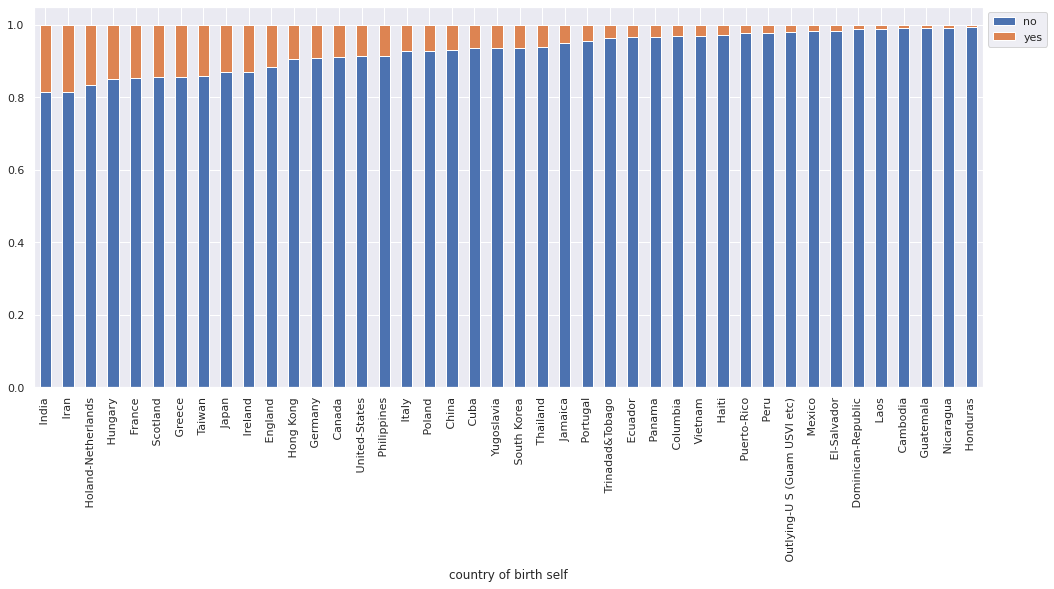


citizenship
TARGET                                              no       yes
citizenship                                                     
 Foreign born- U S citizen by naturalization  0.896421  0.103579
 Native- Born in the United States            0.913199  0.086801
 Native- Born abroad of American Parent(s)    0.933478  0.066522
 Foreign born- Not a citizen of U S           0.962391  0.037609
 Native- Born in Puerto Rico or U S Outlying  0.977956  0.022044
------------------------------------------------------------------------------------------------------------------------


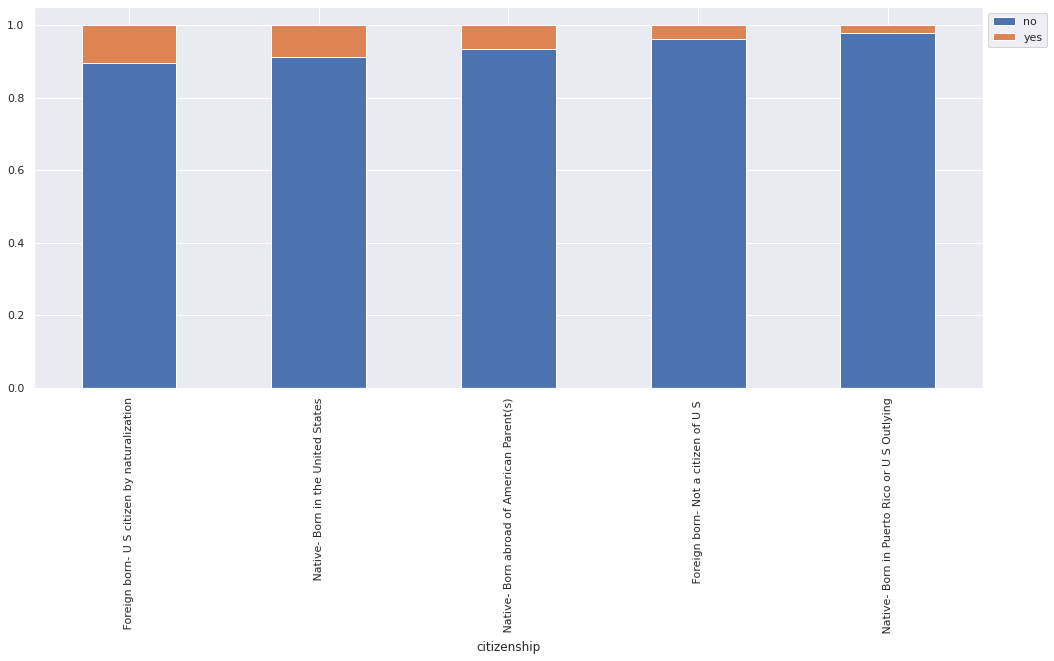


own business or self employed
TARGET                               no       yes
own business or self employed                    
1                              0.783679  0.216321
2                              0.917643  0.082357
0                              0.920353  0.079647
------------------------------------------------------------------------------------------------------------------------


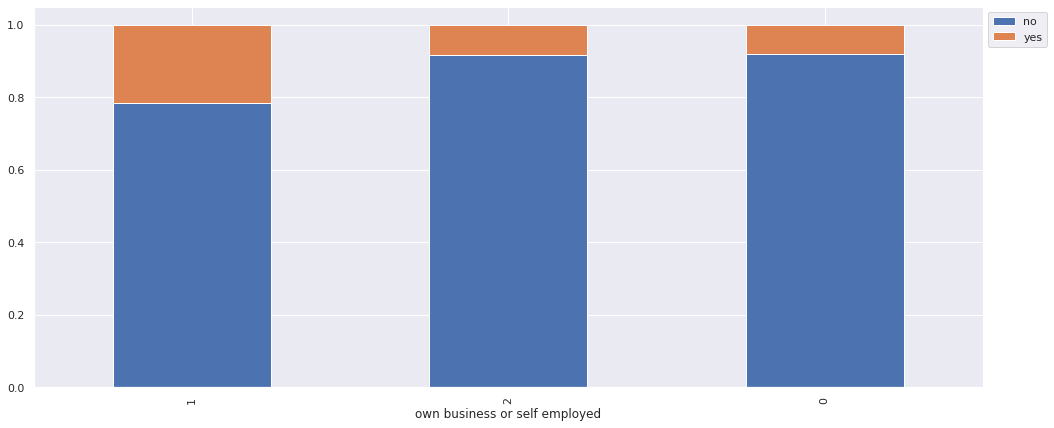


fill inc questionnaire for veteran's admin
TARGET                                            no       yes
fill inc questionnaire for veteran's admin                    
 No                                         0.857576  0.142424
 Not in universe                            0.918121  0.081879
 Yes                                        0.958637  0.041363
------------------------------------------------------------------------------------------------------------------------


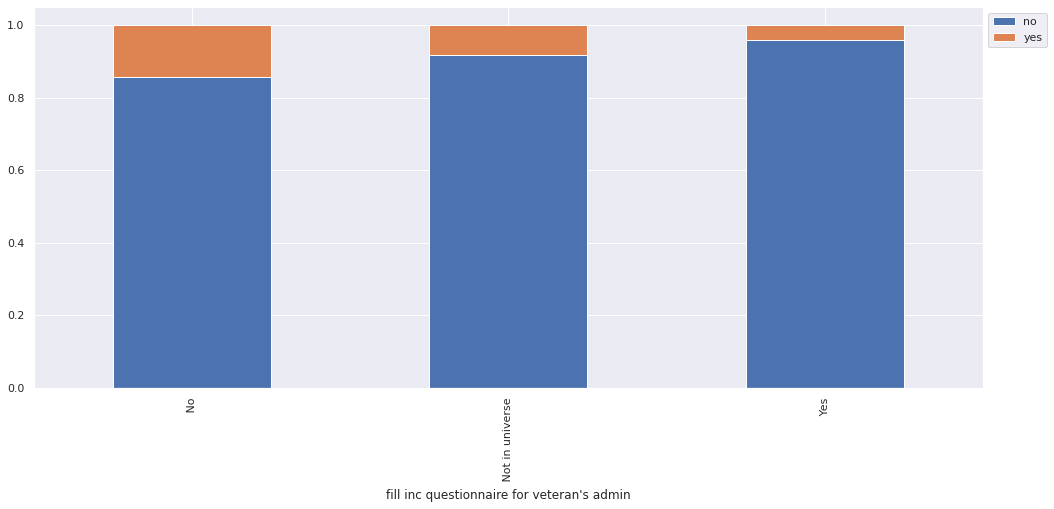


veterans benefits
TARGET                   no       yes
veterans benefits                    
1                  0.877729  0.122271
2                  0.911270  0.088730
0                  1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


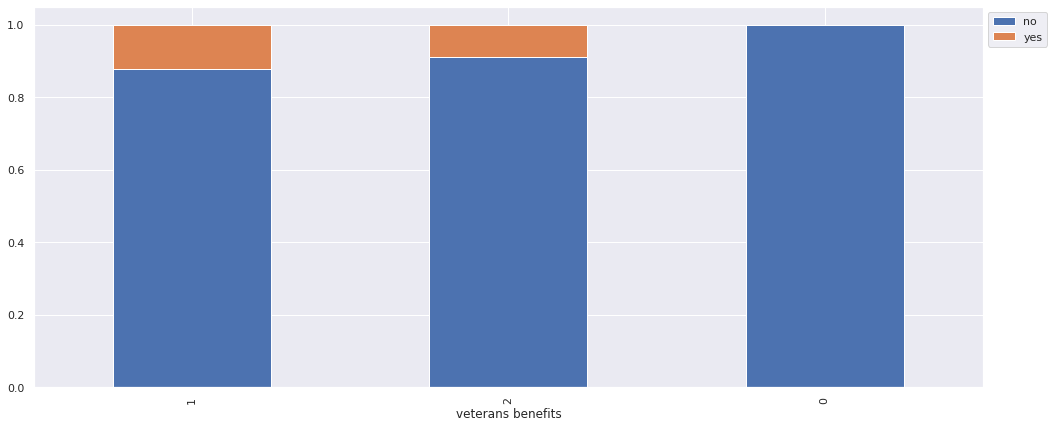


weeks worked in year
TARGET                      no       yes
weeks worked in year                    
52                    0.850462  0.149538
51                    0.889273  0.110727
50                    0.895044  0.104956
49                    0.896491  0.103509
41                    0.911111  0.088889
33                    0.914894  0.085106
48                    0.916710  0.083290
46                    0.920168  0.079832
37                    0.931298  0.068702
44                    0.937155  0.062845
45                    0.943135  0.056865
40                    0.946635  0.053365
39                    0.950596  0.049404
29                    0.953846  0.046154
42                    0.954839  0.045161
43                    0.955844  0.044156
34                    0.960474  0.039526
31                    0.961538  0.038462
36                    0.964133  0.035867
21                    0.964539  0.035461
35                    0.966013  0.033987
38                    0.966837  0.0

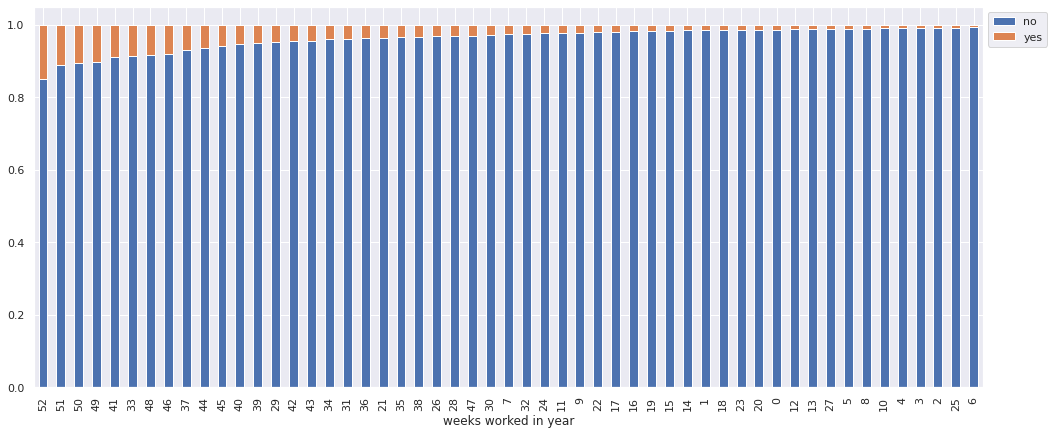


YEAR
TARGET        no       yes
YEAR                      
1995    0.910528  0.089472
1994    0.924404  0.075596
------------------------------------------------------------------------------------------------------------------------


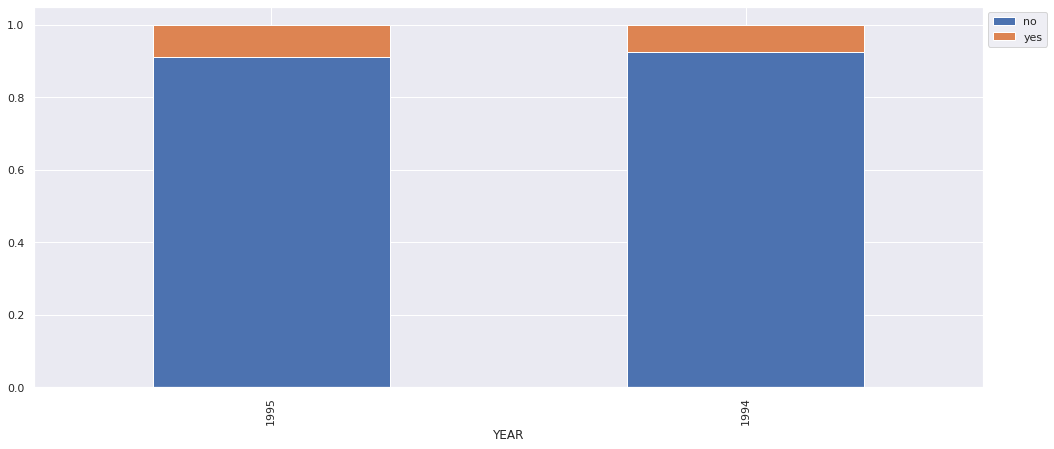


TARGET
TARGET   no  yes
TARGET          
yes     0.0  1.0
no      1.0  0.0
------------------------------------------------------------------------------------------------------------------------


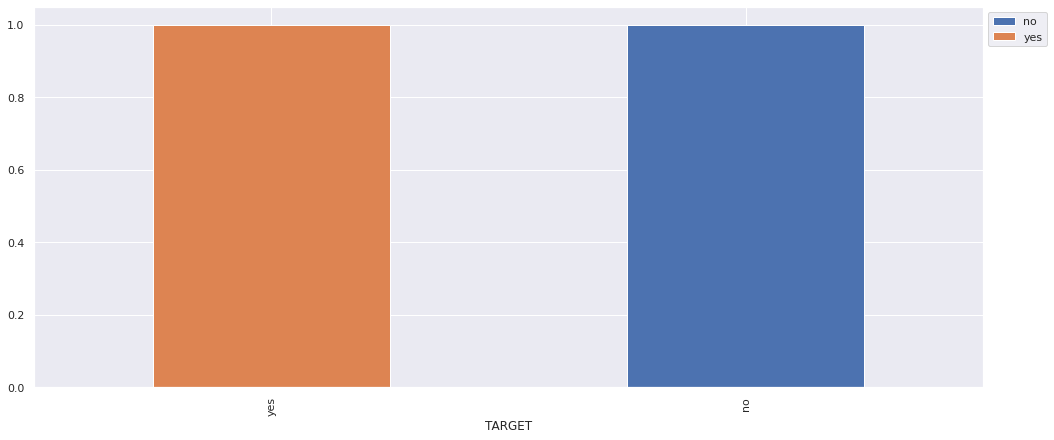

In [28]:
for i in df.columns.to_list():
    print(i)
    stacked_plot(df[i])
    print()

In [30]:
df.describe(include=['object']).T

,count,unique,top,freq
class of worker,157509,9,Private,75191
education,157509,17,High school graduate,45275
enrolled in edu inst last wk,157509,3,Not in universe,146493
marital status,157509,7,Married-civilian spouse present,80573
major industry code,157509,24,Not in universe or children,54287
major occupation code,157509,15,Not in universe,54287
race,157509,5,White,130826
hispanic origin,157509,10,All other,132835
gender,157509,2,Female,80625
member of a labor union,157509,3,Not in universe,137677


In [35]:
df.age.nunique()

91

In [36]:
df.dtypes

age                                            int64
class of worker                               object
industry code                                  int64
occupation code                                int64
education                                     object
wage per hour                                  int64
enrolled in edu inst last wk                  object
marital status                                object
major industry code                           object
major occupation code                         object
race                                          object
hispanic origin                               object
gender                                        object
member of a labor union                       object
reason for unemployment                       object
full or part time employment stat             object
capital gains                                  int64
capital losses                                 int64
divdends from stocks                          

In [37]:
df.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
age,157509.0,39.816112,19.404058,0.0,26.0,38.0,52.0,90.0
industry code,157509.0,20.308440,18.183850,0.0,0.0,24.0,37.0,51.0
occupation code,157509.0,14.971830,14.890825,0.0,0.0,12.0,29.0,46.0
wage per hour,157509.0,72.889797,311.546534,0.0,0.0,0.0,0.0,9916.0
capital gains,157509.0,577.585992,5403.024319,0.0,0.0,0.0,0.0,99999.0
capital losses,157509.0,49.300015,311.199032,0.0,0.0,0.0,0.0,4608.0
divdends from stocks,157509.0,264.806386,2282.967898,0.0,0.0,0.0,0.0,99999.0
num persons worked for employer,157509.0,2.580913,2.400063,0.0,0.0,2.0,5.0,6.0
own business or self employed,157509.0,0.234825,0.629650,0.0,0.0,0.0,0.0,2.0
veterans benefits,157509.0,1.834517,0.538978,0.0,2.0,2.0,2.0,2.0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,157509.0,39.816112,19.404058,0.0,26.0,38.0,52.0,90.0
industry code,157509.0,20.308440,18.183850,0.0,0.0,24.0,37.0,51.0
occupation code,157509.0,14.971830,14.890825,0.0,0.0,12.0,29.0,46.0
wage per hour,157509.0,72.889797,311.546534,0.0,0.0,0.0,0.0,9916.0
capital gains,157509.0,577.585992,5403.024319,0.0,0.0,0.0,0.0,99999.0
capital losses,157509.0,49.300015,311.199032,0.0,0.0,0.0,0.0,4608.0
divdends from stocks,157509.0,264.806386,2282.967898,0.0,0.0,0.0,0.0,99999.0
num persons worked for employer,157509.0,2.580913,2.400063,0.0,0.0,2.0,5.0,6.0
own business or self employed,157509.0,0.234825,0.629650,0.0,0.0,0.0,0.0,2.0
veterans benefits,157509.0,1.834517,0.538978,0.0,2.0,2.0,2.0,2.0


In [40]:
# oversampling and undersampling data using SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler